In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from grad import *

# Example 1

> $dim = 1$.
>
> $f(x) = x - sin(x)$, where $x \geq 0; -x$, otherwise

In [2]:
def f(coord):
    if coord >= 0:
        return coord - np.sin(coord)
    else:
        return -coord

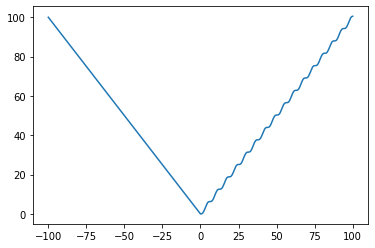

In [3]:
xs = np.linspace(-100, 100, 1000)
ys = list(map(f, xs))

plt.plot(xs, ys)
plt.show()

[0.06860234] [5.37976648e-05]


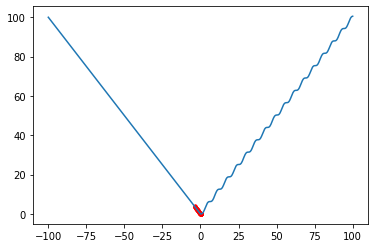

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1)
    print(x, y)

    plt.plot(meta["points"][:, 0], meta["points"][:, 1], 'r.')
    plt.plot(xs, ys)
    plt.show()

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [5]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

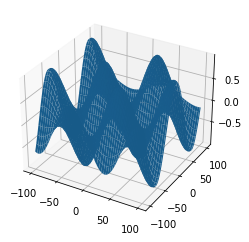

In [6]:
t = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f([X, Y]))

plt.show()

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW1/grad.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([coord, f(coord)]).reshape(1, 2),


[29.49287489 36.63114484] -0.16108749462325975
{'gradient_call_count': 1000, 'function_call_count': 1000, 'points': array([[array([29.47429783, 41.59111281]), 0.08494268162508177],
       [array([29.47425647, 41.58615451]), 0.08469681458143652],
       [array([29.47421522, 41.58119611]), 0.08445093731627176],
       ...,
       [array([29.49264252, 36.64587991]), -0.1603635881383347],
       [array([29.49271986, 36.64096802]), -0.1606049093197202],
       [array([29.49279732, 36.63605633]), -0.1608462114905337]],
      dtype=object)}


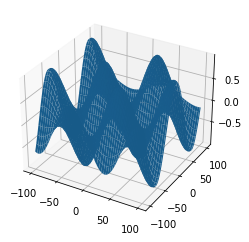

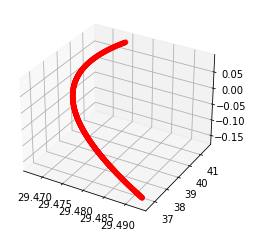

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (xs, y), meta = gradient_descent(f, 2)
    print(xs, y)
    print(meta)

    # ax.scatter([0, 1], [0, 1], [1, 1], c='r')

    t = np.linspace(-100, 100, 100)
    X, Y = np.meshgrid(t, t)
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(X, Y, f([X, Y]))

    XS = np.array([])
    YS = np.array([])
    ZS = meta["points"][:, 1]

    for point in meta["points"][:, 0]:
        XS = np.append(XS, point[0])
        YS = np.append(YS, point[1])

    ax_points = plt.figure().add_subplot(projection='3d')
    ax_points.scatter(XS, YS, ZS, c='r')

    plt.show()